In [1]:
import sys
sys.path.append("../")
import os
import matplotlib.pyplot as plt
import cv2 as cv
import random
import numpy as np

In [2]:
PREFIX="../../../../"

PATH_TO_TRAIN_DATA="projects/vc/data/ad/open/Poles/train"
PATH_TO_VAL_DATA="projects/vc/data/ad/open/Poles/test"

p_test_img = PREFIX + PATH_TO_TRAIN_DATA + '/images'
p_val_img = PREFIX + PATH_TO_VAL_DATA + '/images'

print(os.getcwd())

/cluster/home/tristanw/tdt17-mini-project/augmentation


In [3]:
if os.path.exists(p_test_img):
    num_images = len(os.listdir(p_test_img))
    print("Data set found! Number images: ", num_images)
else:
    print("WARNING: Data set couldn't be found!")

if os.path.exists(p_val_img):
    num_images_val = len(os.listdir(p_val_img))
    print("Validation set found! Number images: ", num_images_val)
else:
    print("WARNING: Validation set couldn't be found!")

Data set found! Number images:  1809
Validation set found! Number images:  450


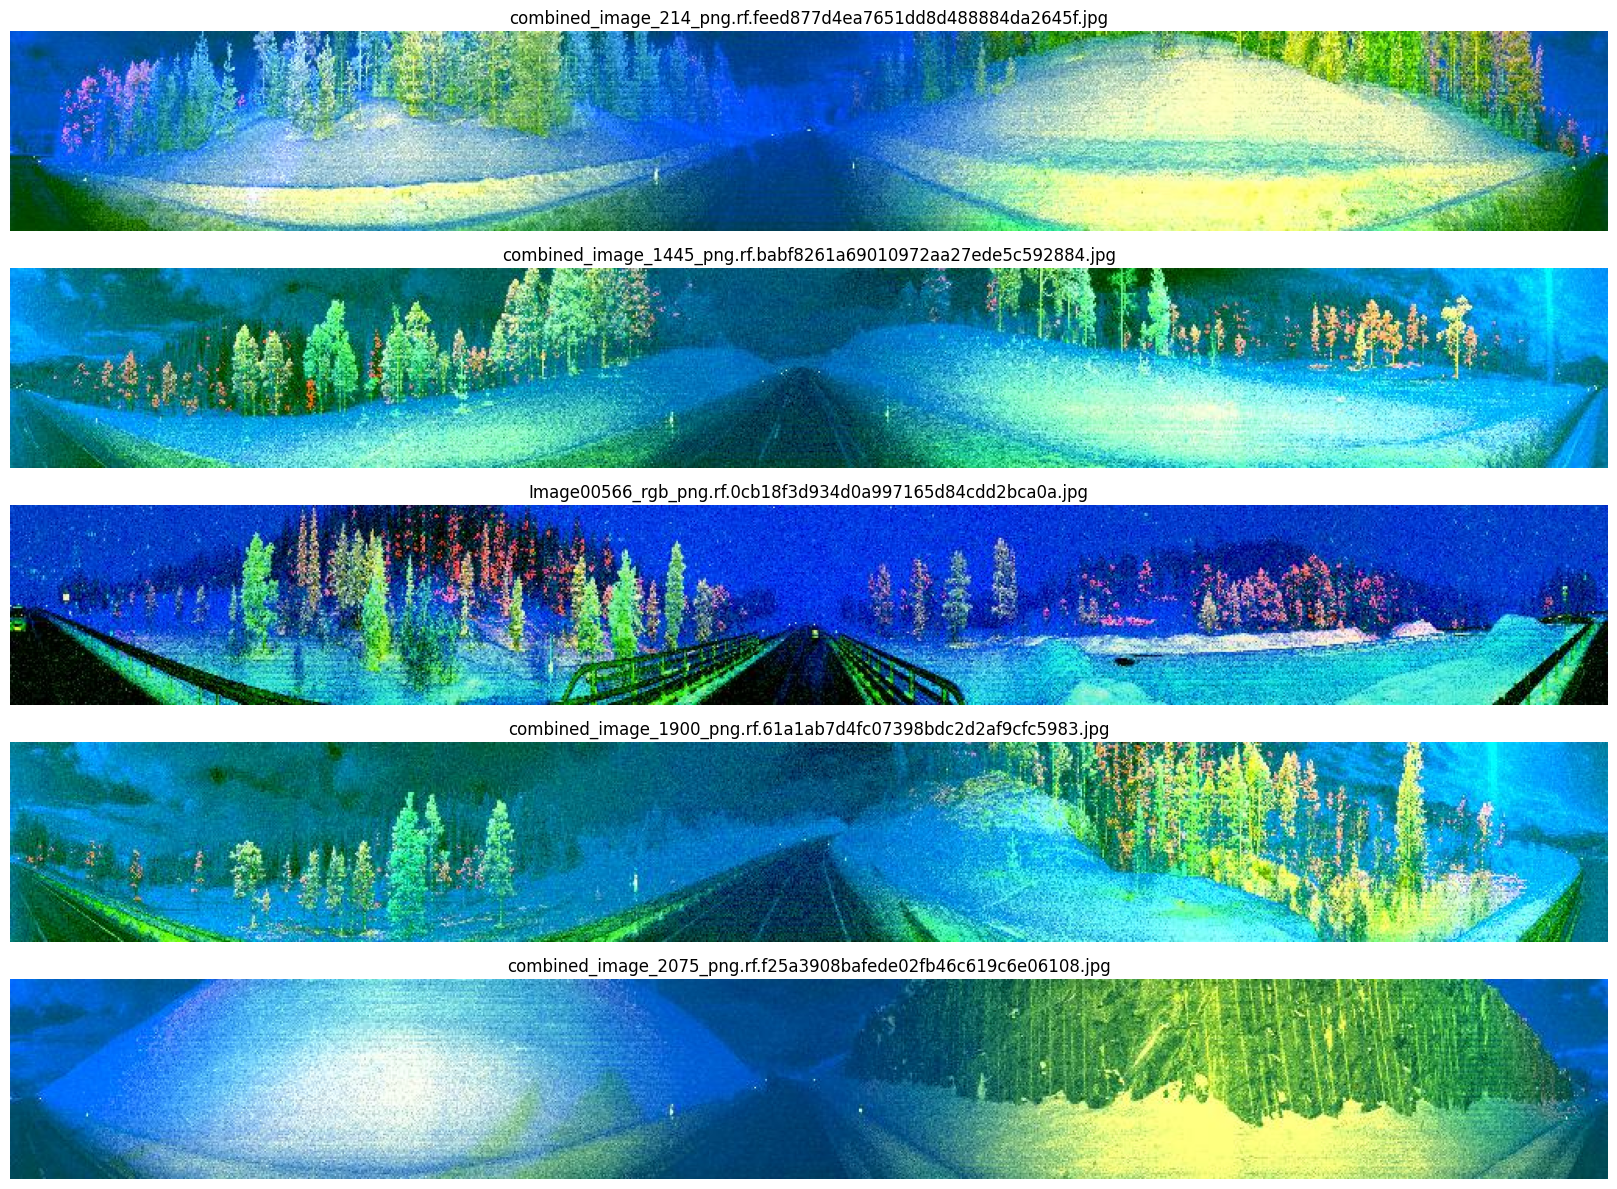

In [4]:
sample_images = random.sample(os.listdir(p_test_img), 5)
plt.figure(figsize=(24,12))
for i, img_name in enumerate(sample_images):
    img = cv.imread(os.path.join(p_test_img, img_name))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.subplot(5, 1, i+1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
plt.tight_layout()
plt.show()

../../../../projects/vc/data/ad/open/Poles/train/images/combined_image_214_png.rf.feed877d4ea7651dd8d488884da2645f.jpg


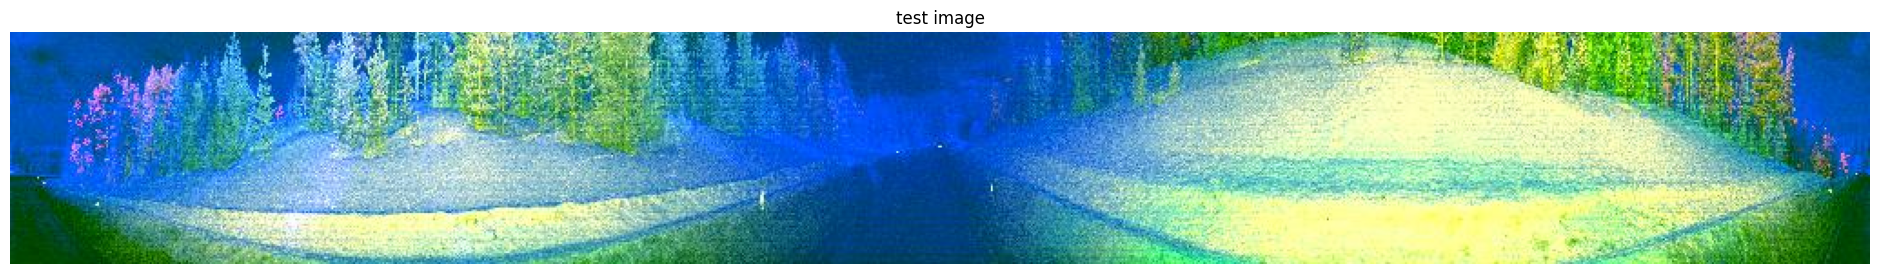

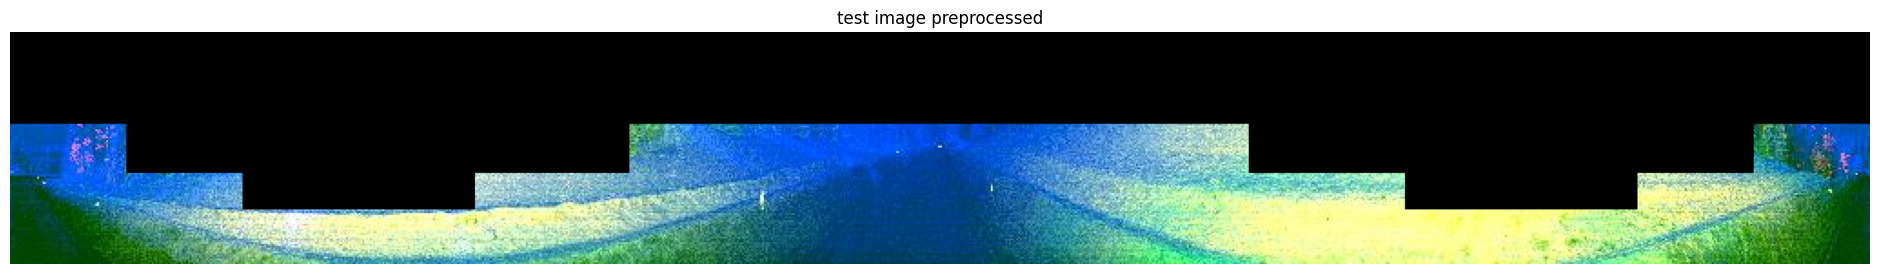

In [15]:
# Define a preprocessing function
def preprocess_image(img_path):
    img = cv.imread(img_path)

    # alpha = 1.8  # Contrast control (1.0-3.0)
    # beta = 20     # Brightness control (0-100)
    # img = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

    # img = cv.GaussianBlur(img, (3, 3), 0)
    height, width, _ = img.shape

    # First iteration of drawing the mask
    ignore_bottom = 30
    corner_width = int(width // 8)
    left_mask_end = int(width // 4)
    right_mask_start = int(3 * width // 4)

    img[0 : height - ignore_bottom, corner_width:left_mask_end] = 0
    img[0 : height - ignore_bottom, right_mask_start:width - corner_width] = 0

    # Second iteration of drawing the mask
    ignore_bottom = 50
    corner_width = int(width // 16)
    left_mask_end = int(width // 3)
    right_mask_start = int(2 * width // 3)

    # Apply the second mask on the original image
    img[0 : height - ignore_bottom, corner_width:left_mask_end] = 0
    img[0 : height - ignore_bottom, right_mask_start:width - corner_width] = 0
    
    mask = np.zeros_like(img)
    mask[int(height // 2.5) :, :] = img[int(height // 2.5) :, :]
    img = mask

    return img

test_img = os.path.join(p_test_img, sample_images[0])
print(test_img)

img = cv.imread(os.path.join(p_test_img, sample_images[0]))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(24, 12))
plt.title("test image")
plt.imshow(img)
plt.axis('off')
plt.show()

img_processed = preprocess_image(test_img)
img_processed = cv.cvtColor(img_processed, cv.COLOR_BGR2RGB)
plt.figure(figsize=(24, 12))
plt.title("test image preprocessed")
plt.imshow(img_processed)
plt.axis('off')
plt.show()